In [19]:
import numpy as np
import warnings 
warnings.filterwarnings
%pylab inline
%load_ext autoreload
%autoreload 2
from helper import *

Populating the interactive namespace from numpy and matplotlib


/home/dli36/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [20]:
def variableTSplot(numberOfBanks, var = 'Held to Maturity (Book Value)'):
    commonBanks = []
    for year in range(2004,2024):
        if year == 2023:
                month = 3
                _, bankThisMonth = banks(year, month, numberOfBanks)
                commonBanks = [bank for bank in commonBanks if bank in bankThisMonth]
        else:
            for month in [3]:
                if year == 2004 and month == 3:
                    _, commonBanks = banks(year, month, numberOfBanks)
                else:
                    _, bankThisMonth = banks(year, month, numberOfBanks)
                    commonBanks = [bank for bank in commonBanks if bank in bankThisMonth]
                
    meanH = [] 
    date = []   
                
    for year in range(2004,2024):
        if year == 2004:
            month = 3
            meanH.append(sdf(year, month, commonBanks)[var].mean())
            date.append(str(year) + "-" + str(month)) 
        else:
            for month in [3]:
                meanH.append(sdf(year, month, commonBanks)[var].mean())
                date.append(str(year) + "-" + str(month)) 
    return meanH, date

In [21]:
def meanValuePlot(var):
    meanH1, date = variableTSplot(4, var)
    meanH2, date = variableTSplot(20, var)
    meanH3, date = variableTSplot(50, var)
    plt.plot(meanH1, "o-",markersize = 15,label = 'Top 4 Banks')
    plt.plot(meanH2, "^-",markersize = 15,label = 'Top 20 Banks')
    plt.plot(meanH3, "*-",markersize = 15,label = 'Top 50 Banks')
    plt.xlabel("Date")
    plt.ylabel("Ratio")
    plt.xticks(np.arange(0, len(date)), date, rotation=90)
    plt.legend()

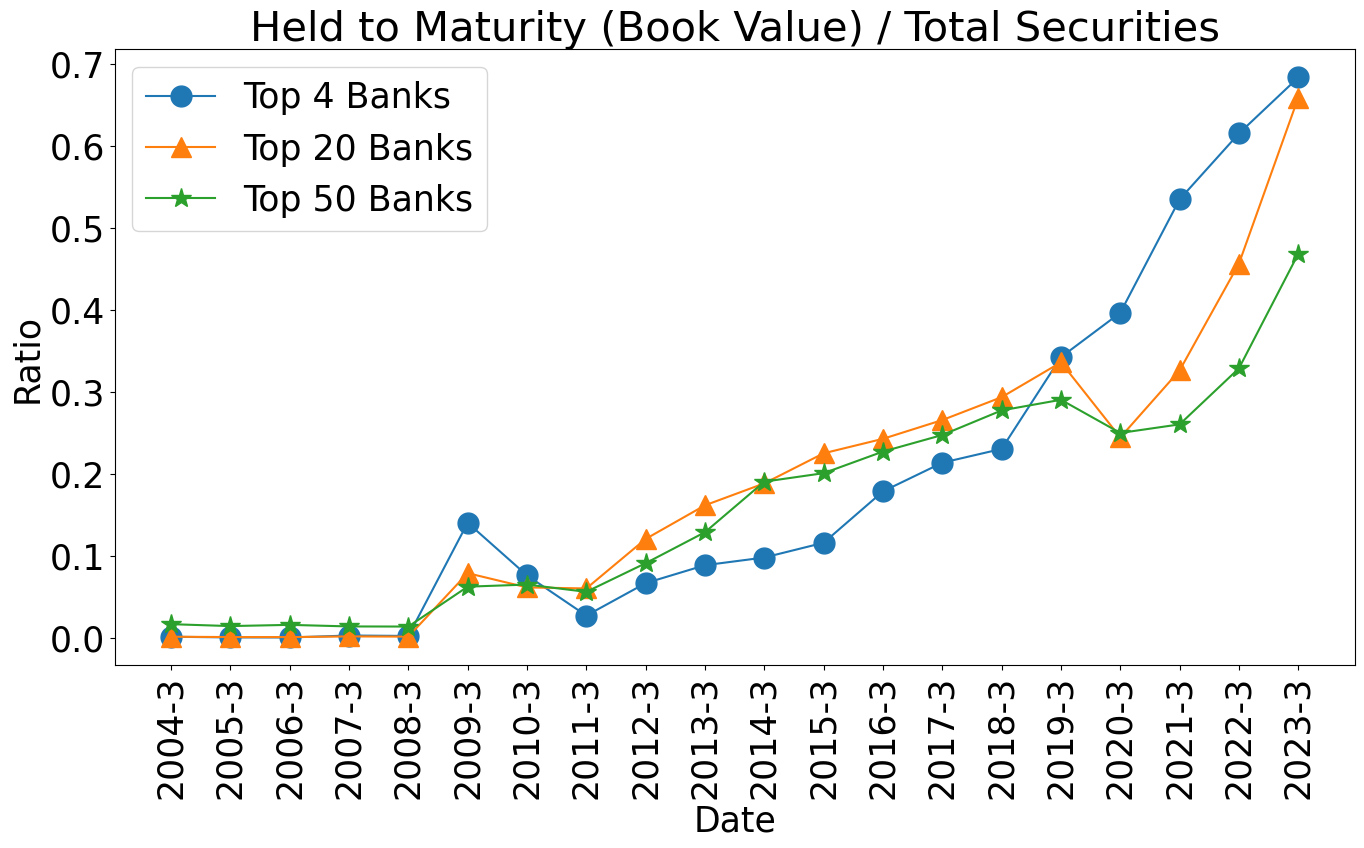

In [22]:
pylab.rcParams['figure.figsize'] = (16, 8)
pylab.rcParams['font.size'] = 25

plt.title("Held to Maturity (Book Value) / Total Securities")
meanValuePlot('Held to Maturity (Book Value)')

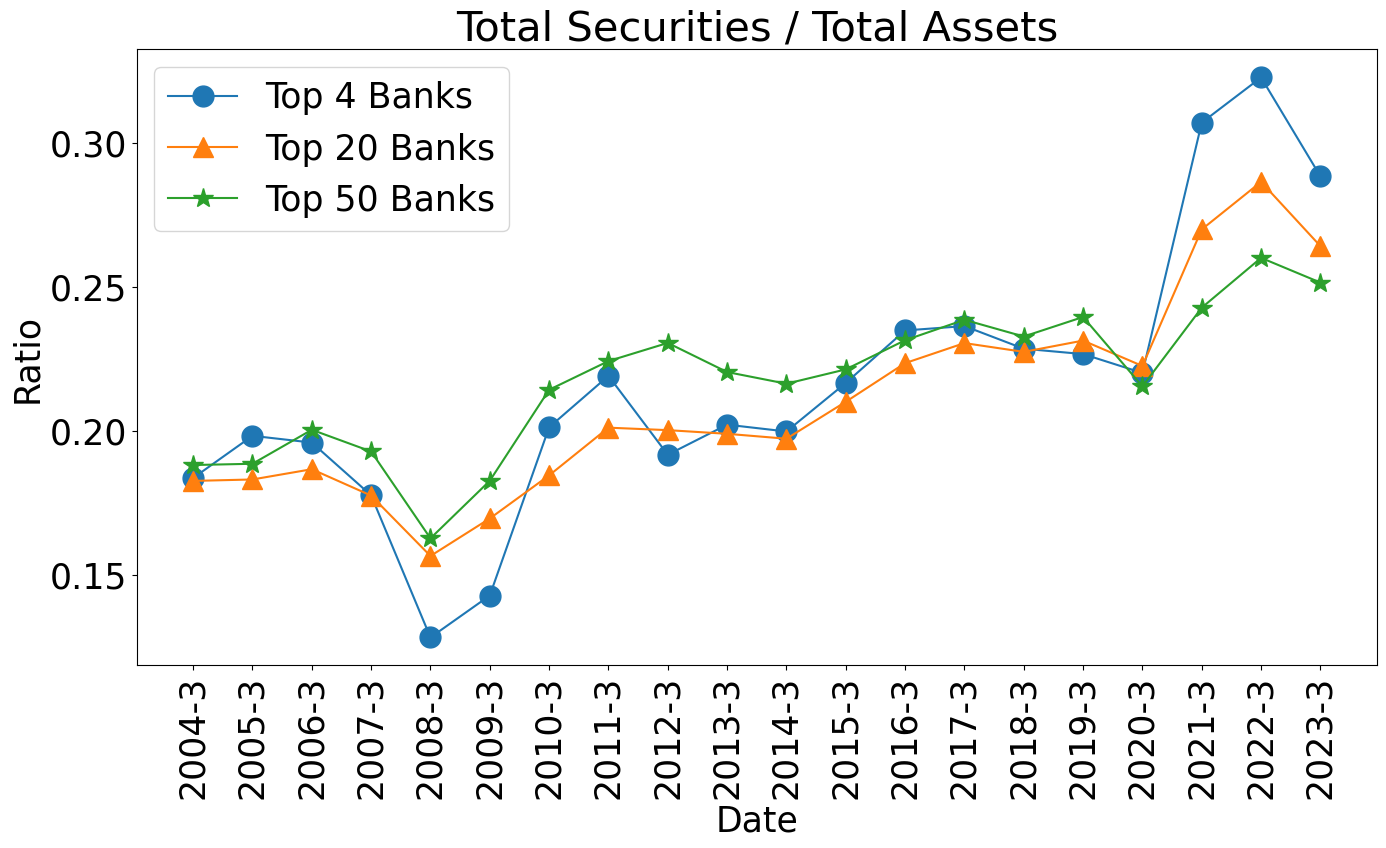

In [23]:
plt.title("Total Securities / Total Assets")
meanValuePlot('Securities')

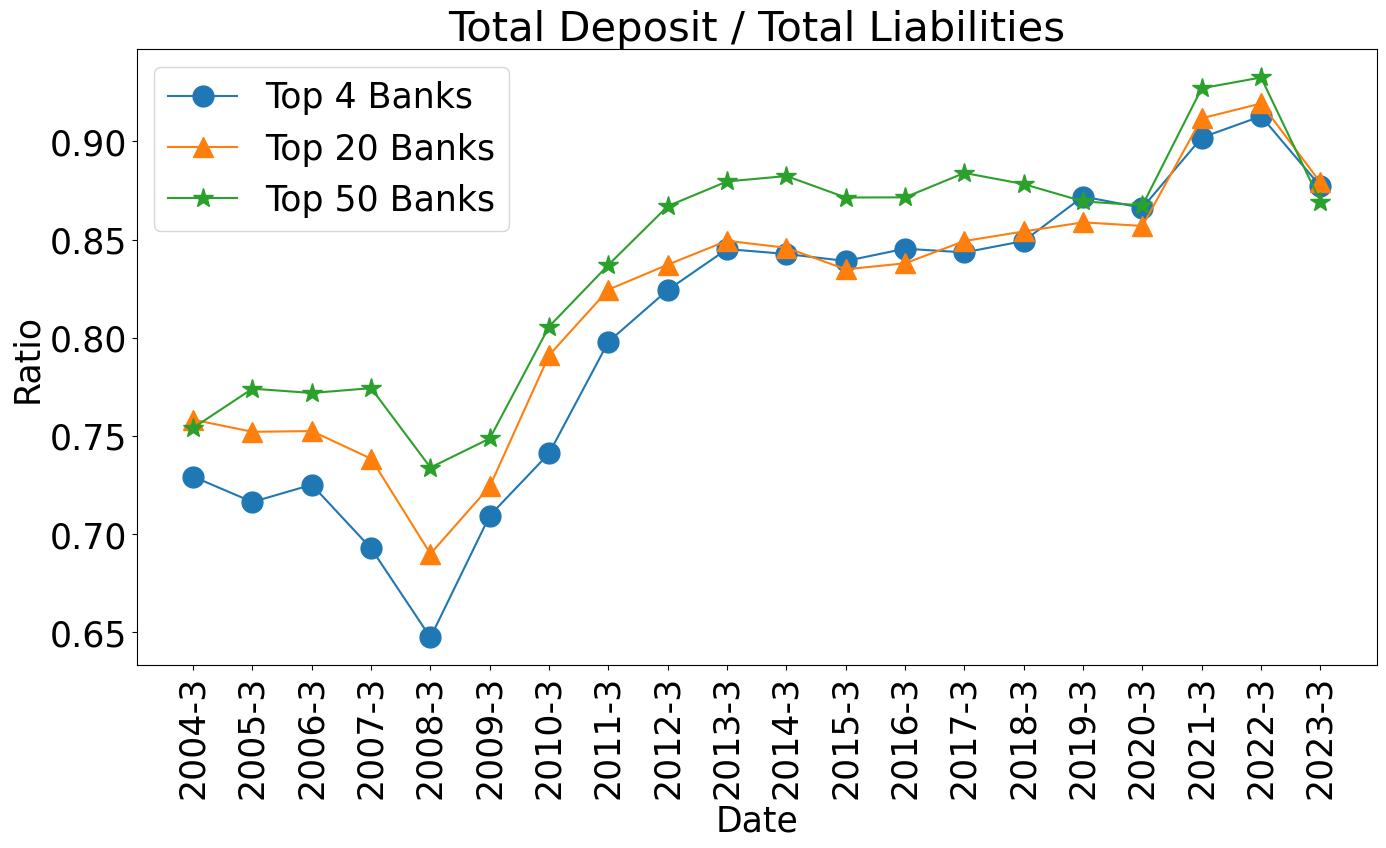

In [25]:
plt.title("Total Deposit / Total Liabilities")
meanValuePlot('Deposits')

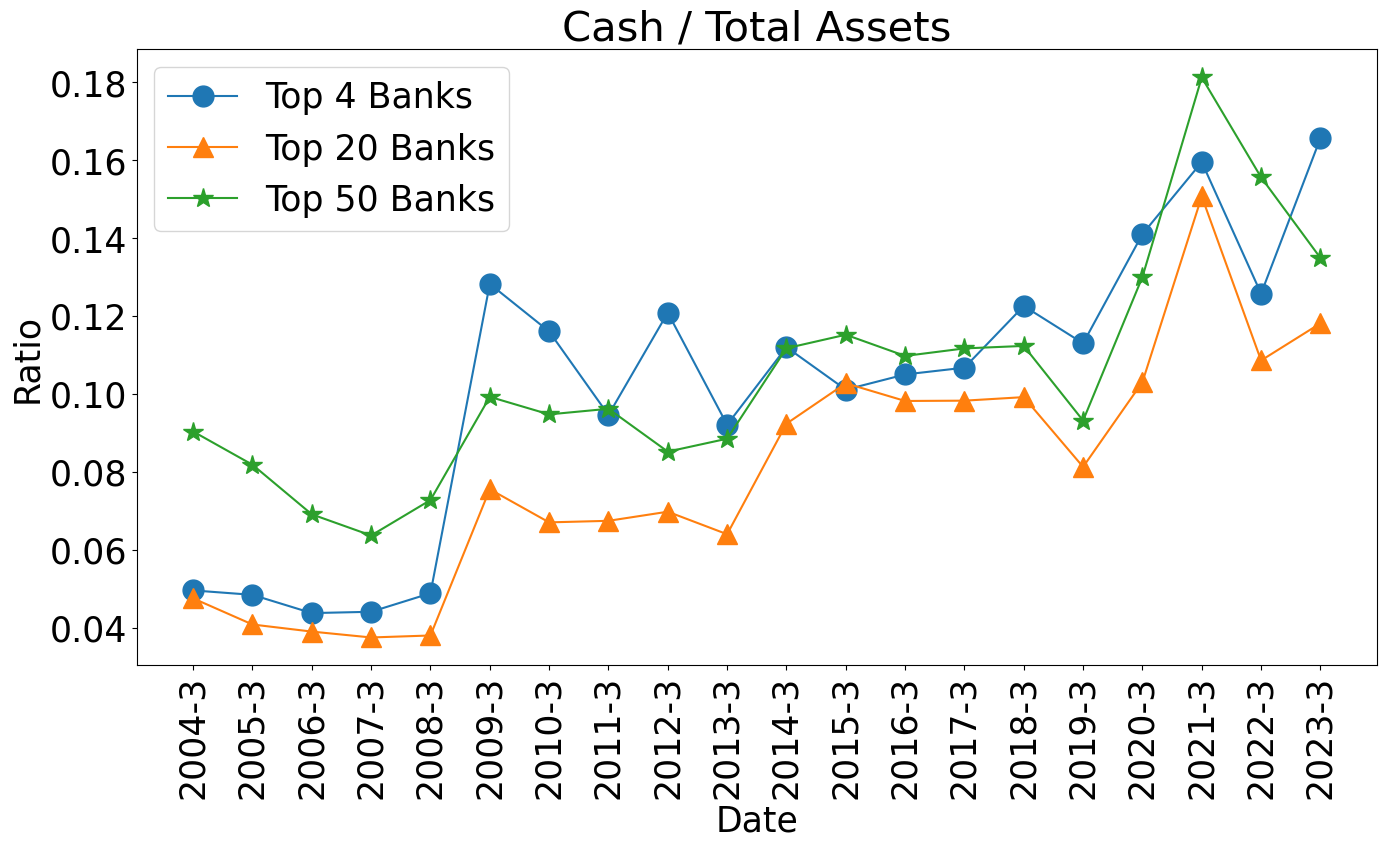

In [26]:
plt.title("Cash / Total Assets")
meanValuePlot("Cash and Balances due from Depository Institutions")

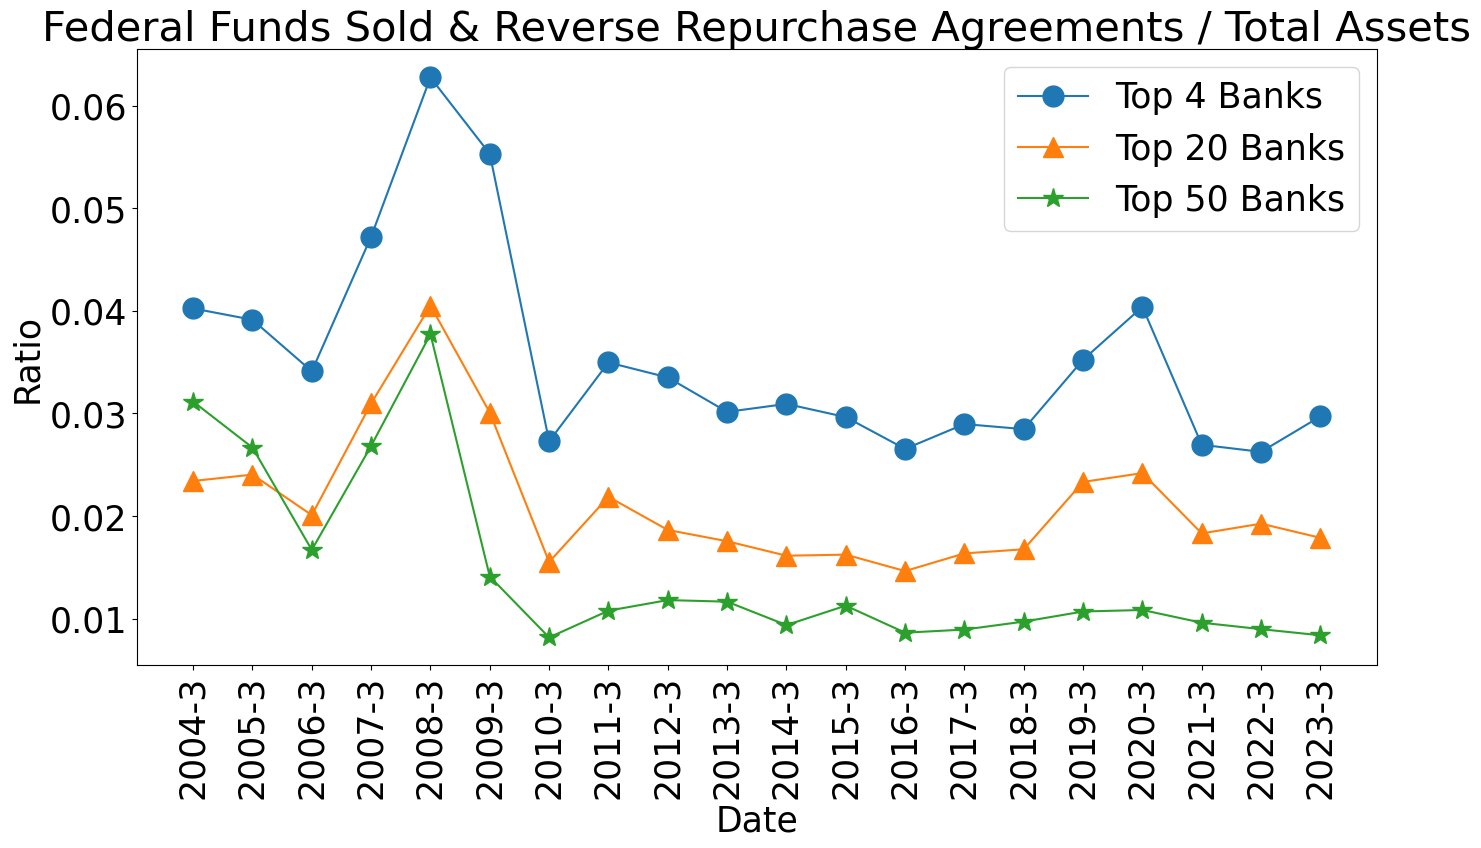

In [27]:
plt.title("Federal Funds Sold & Reverse Repurchase Agreements / Total Assets")
meanValuePlot("Federal Funds Sold & Reverse Repurchase Agreements")